In [1]:
import numpy as np 
import pandas as pd

# 표준화
# student.csv 파일의 내용을 가져오기 
# index 로 이름 설정 
df = pd.read_csv('../data/student.csv', encoding='cp949', index_col='이름')
print(df)

국어  영어  수학
이름             
박지영  90  85  55
김태함  70  65  80
김효섭  92  95  76
임경희  76  89  88
권혁진  97  87  83
하혜진  80  86  97
이준원  20  30  40
윤정웅  50  52  54
주시현  95  70  80


In [2]:
import platform
from matplotlib import font_manager, rc

# 그래프의 한글 깨짐
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [3]:
# 인덱스를 기준으로 해서 막대 그래프 그리기
df.plot(kind='bar')

In [4]:
# 표준값 작업 
# 각 과목의 평균과 표준편차 구하기 
kormean, korstd = df['국어'].mean(), df['국어'].std()
engmean, engstd = df['영어'].mean(), df['영어'].std()
matmean, matstd = df['수학'].mean(), df['수학'].std()

In [5]:
# 표준값 구하기 - (자신의값-평균)/표준편차
# 0.0이면 중간
# 1.0이면 상하위 15%
# 2.0이면 상하위 1.1%
df['국어표준값'] = (df['국어'] - kormean)/korstd
df['영어표준값'] = (df['영어'] - engmean)/engstd
df['수학표준값'] = (df['수학'] - matmean)/matstd
print(df[['국어표준값','영어표준값','수학표준값']])

국어표준값     영어표준값     수학표준값
이름                               
박지영  0.616320  0.554321 -0.941716
김태함 -0.176091 -0.386979  0.399335
김효섭  0.695561  1.024971  0.184767
임경희  0.061632  0.742581  0.828471
권혁진  0.893664  0.648451  0.560261
하혜진  0.220114  0.601386  1.311250
이준원 -2.157120 -2.034253 -1.746346
윤정웅 -0.968503 -0.998823 -0.995358
주시현  0.814423 -0.151654  0.399335


AxesSubplot(0.125,0.125;0.775x0.755)


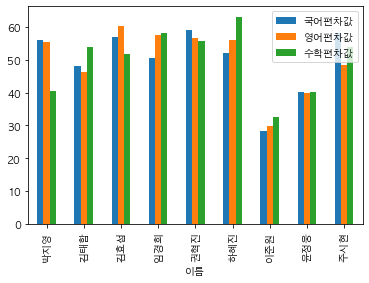

In [6]:
# 표준값은 비교가 가능하기는 하지만 사람이 알아보기 힘들다. 
# 표준값 * 10 + 50 을 해서 편차값을 만들어서 보고서 작성 
df['국어편차값'] = (df['국어표준값']*10)+50
df['영어편차값'] = (df['영어표준값']*10)+50
df['수학편차값'] = (df['수학표준값']*10)+50
print(df[['국어편차값', '영어편차값', '수학편차값']].plot(kind='bar'))

In [7]:
# 최대값으로 나누어서 값을 저장 - 정규화
# (자신의값-최소값)/(최대값-최소값)으로 하기도함 
df['국어정규화1'] = df['국어'] / df['국어'].max()
df['국어정규화2'] = (df['국어']-df['국어'].min()) / (df['국어'].max()-df['국어'].min())
print(df[['국어정규화1', '국어정규화2']])

국어정규화1    국어정규화2
이름                     
박지영  0.927835  0.909091
김태함  0.721649  0.649351
김효섭  0.948454  0.935065
임경희  0.783505  0.727273
권혁진  1.000000  1.000000
하혜진  0.824742  0.779221
이준원  0.206186  0.000000
윤정웅  0.515464  0.389610
주시현  0.979381  0.974026
